In [1]:
import numpy as np
import torch

np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

In [2]:
from datasets import load_dataset

dataset = load_dataset("tweet_eval", "emotion")
train_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/233k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/105k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3257 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1421 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/374 [00:00<?, ? examples/s]

In [3]:
print("Dataset Structure:")
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Features: {train_dataset.features}")
print(f"Label names: {train_dataset.features['label'].names}")

Dataset Structure:
Train samples: 3257
Validation samples: 374
Test samples: 1421
Features: {'text': Value('string'), 'label': ClassLabel(names=['anger', 'joy', 'optimism', 'sadness'])}
Label names: ['anger', 'joy', 'optimism', 'sadness']


In [4]:
from collections import Counter

train_labels = train_dataset["label"]
val_labels = val_dataset["label"]
test_labels = test_dataset["label"]

label_counts_train = Counter(train_labels)
label_counts_val = Counter(val_labels)
label_counts_test = Counter(test_labels)

print("\nLabel Distribution:")
print(f"Train: {dict(label_counts_train)}")
print(f"Val: {dict(label_counts_val)}")
print(f"Test: {dict(label_counts_test)}")


Label Distribution:
Train: {2: 294, 0: 1400, 1: 708, 3: 855}
Val: {0: 160, 3: 89, 1: 97, 2: 28}
Test: {3: 382, 0: 558, 1: 358, 2: 123}


In [5]:
text_lengths_train = [len(text.split()) for text in train_dataset["text"]]
text_lengths_val = [len(text.split()) for text in val_dataset["text"]]
text_lengths_test = [len(text.split()) for text in test_dataset["text"]]


print(f"\nText Length Statistics (Words):")
print(f"Train - Mean: {np.mean(text_lengths_train):.2f}, Median: {np.median(text_lengths_train):.2f}, Max: {max(text_lengths_train)}")
print(f"Val - Mean: {np.mean(text_lengths_val):.2f}, Median: {np.median(text_lengths_val):.2f}, Max: {max(text_lengths_val)}")
print(f"Test - Mean: {np.mean(text_lengths_test):.2f}, Median: {np.median(text_lengths_test):.2f}, Max: {max(text_lengths_test)}")




Text Length Statistics (Words):
Train - Mean: 16.17, Median: 17.00, Max: 33
Val - Mean: 15.71, Median: 16.00, Max: 32
Test - Mean: 15.88, Median: 16.00, Max: 36


In [6]:
char_lengths_train = [len(text) for text in train_dataset["text"]]
char_lengths_val = [len(text) for text in val_dataset["text"]]
char_lengths_test = [len(text) for text in test_dataset["text"]]

print(f"\nCharacter Length Statistics:")
print(f"Train - Mean: {np.mean(char_lengths_train):.2f}, Median: {np.median(char_lengths_train):.2f}, Max: {max(char_lengths_train)}")
print(f"Val - Mean: {np.mean(char_lengths_val):.2f}, Median: {np.median(char_lengths_val):.2f}, Max: {max(char_lengths_val)}")
print(f"Test - Mean: {np.mean(char_lengths_test):.2f}, Median: {np.median(char_lengths_test):.2f}, Max: {max(char_lengths_test)}")



Character Length Statistics:
Train - Mean: 91.27, Median: 96.00, Max: 160
Val - Mean: 88.64, Median: 91.50, Max: 152
Test - Mean: 89.83, Median: 93.00, Max: 147


In [7]:
emotion_labels = {i: name for i, name in enumerate(train_dataset.features['label'].names)}

print(f"\nSample Texts by Label:")
for label in sorted(set(train_labels)):
    sample_texts = [text for text, lbl in zip(train_dataset["text"], train_labels) if lbl == label][:2]
    print(f"Label {label} ({emotion_labels[label]}):")
    for i, text in enumerate(sample_texts, 1):
        print(f"  {i}. {text}")
    print()


Sample Texts by Label:
Label 0 (anger):
  1. My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs
  2. Rooneys fucking untouchable isn't he? Been fucking dreadful again, depay has looked decent(ish)tonight

Label 1 (joy):
  1. No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu
  2. Tiller and breezy should do a collab album. Rapping and singing prolly be fire

Label 2 (optimism):
  1. “Worry is a down payment on a problem you may never have'.  Joyce Meyer.  #motivation #leadership #worry
  2. I saved him after ordering him to risk his life. I didn't panic but stayed calm and rescued him.

Label 3 (sadness):
  1. it's pretty depressing when u hit pan on ur favourite highlighter
  2. Making that yearly transition from excited and hopeful college returner to sick and exhausted pessimist. #college



In [8]:
unique_train = len(set(train_dataset["text"]))
unique_val = len(set(val_dataset["text"]))
unique_test = len(set(test_dataset["text"]))

print(f"Unique Texts:")
print(f"Train: {unique_train}/{len(train_dataset)} ({unique_train/len(train_dataset)*100:.2f}%)")
print(f"Val: {unique_val}/{len(val_dataset)} ({unique_val/len(val_dataset)*100:.2f}%)")
print(f"Test: {unique_test}/{len(test_dataset)} ({unique_test/len(test_dataset)*100:.2f}%)")


Unique Texts:
Train: 3232/3257 (99.23%)
Val: 374/374 (100.00%)
Test: 1421/1421 (100.00%)


In [9]:
from collections import defaultdict
import re

def get_word_freq(texts):
    word_freq = defaultdict(int)
    for text in texts:
        words = re.findall(r'\b\w+\b', text.lower())
        for word in words:
            word_freq[word] += 1
    return dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])

train_word_freq = get_word_freq(train_dataset["text"])
print(f"\nTop 20 Most Common Words in Training Set:")
for word, freq in train_word_freq.items():
    print(f"{word}: {freq}")



Top 20 Most Common Words in Training Set:
user: 2019
i: 1529
the: 1515
to: 1208
a: 1057
and: 885
you: 739
is: 738
of: 671
it: 645
in: 569
that: 525
t: 508
my: 497
s: 496
for: 417
on: 379
me: 353
this: 300
so: 295


In [10]:

total_train = len(train_dataset)
class_weights = {}
for label, count in label_counts_train.items():
    class_weights[label] = total_train / (len(label_counts_train) * count)

print(f"\nClass Imbalance (Training Set):")
for label in sorted(label_counts_train.keys()):
    percentage = (label_counts_train[label] / total_train) * 100
    print(f"Label {label} ({emotion_labels[label]}): {label_counts_train[label]} samples ({percentage:.2f}%), Weight: {class_weights[label]:.3f}")



Class Imbalance (Training Set):
Label 0 (anger): 1400 samples (42.98%), Weight: 0.582
Label 1 (joy): 708 samples (21.74%), Weight: 1.150
Label 2 (optimism): 294 samples (9.03%), Weight: 2.770
Label 3 (sadness): 855 samples (26.25%), Weight: 0.952


In [14]:
!pip install emoji

In [15]:
import emoji

def count_emojis(text):
    return sum(char in emoji.EMOJI_DATA for char in text)

def count_hashtags(text):
    return len(re.findall(r'#\w+', text))

def count_mentions(text):
    return len(re.findall(r'@\w+', text))

def extract_punctuation_features(text):
    return {
        "exclaim_count": text.count("!"),
        "question_count": text.count("?"),
        "ellipsis_count": text.count("..."),
        "all_caps": sum(1 for w in text.split() if w.isupper() and len(w) > 1)
    }


In [16]:
emoji_counts_train = [count_emojis(text) for text in train_dataset["text"]]
hashtag_counts_train = [count_hashtags(text) for text in train_dataset["text"]]
mention_counts_train = [count_mentions(text) for text in train_dataset["text"]]
punct_stats_train = [extract_punctuation_features(text) for text in train_dataset["text"]]

exclaim_counts = [p["exclaim_count"] for p in punct_stats_train]
question_counts = [p["question_count"] for p in punct_stats_train]
caps_counts = [p["all_caps"] for p in punct_stats_train]

print(f"\nSocial Media Features (Training Set):")
print(f"Emojis - Mean: {np.mean(emoji_counts_train):.2f}, Max: {max(emoji_counts_train)}")
print(f"Hashtags - Mean: {np.mean(hashtag_counts_train):.2f}, Max: {max(hashtag_counts_train)}")
print(f"Mentions - Mean: {np.mean(mention_counts_train):.2f}, Max: {max(mention_counts_train)}")
print(f"Exclamation marks - Mean: {np.mean(exclaim_counts):.2f}, Max: {max(exclaim_counts)}")
print(f"Question marks - Mean: {np.mean(question_counts):.2f}, Max: {max(question_counts)}")
print(f"All caps words - Mean: {np.mean(caps_counts):.2f}, Max: {max(caps_counts)}")



Social Media Features (Training Set):
Emojis - Mean: 0.23, Max: 73
Hashtags - Mean: 1.01, Max: 14
Mentions - Mean: 0.63, Max: 9
Exclamation marks - Mean: 0.25, Max: 8
Question marks - Mean: 0.13, Max: 6
All caps words - Mean: 0.22, Max: 17


In [17]:
def enhanced_preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '[URL]', text, flags=re.MULTILINE)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

for i in range(3):
    original = train_dataset["text"][i]
    processed = enhanced_preprocess_text(original)
    print(f"Original: {original}")
    print(f"Enhanced: {processed}")
    print(f"Features - Emojis: {count_emojis(original)}, Hashtags: {count_hashtags(original)}, Mentions: {count_mentions(original)}")
    print()

Original: “Worry is a down payment on a problem you may never have'.  Joyce Meyer.  #motivation #leadership #worry
Enhanced: “Worry is a down payment on a problem you may never have'. Joyce Meyer. #motivation #leadership #worry
Features - Emojis: 0, Hashtags: 3, Mentions: 0

Original: My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs
Enhanced: My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs
Features - Emojis: 0, Hashtags: 2, Mentions: 0

Original: No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu
Enhanced: No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu
Features - Emojis: 0, Hashtags: 0, Mentions: 0



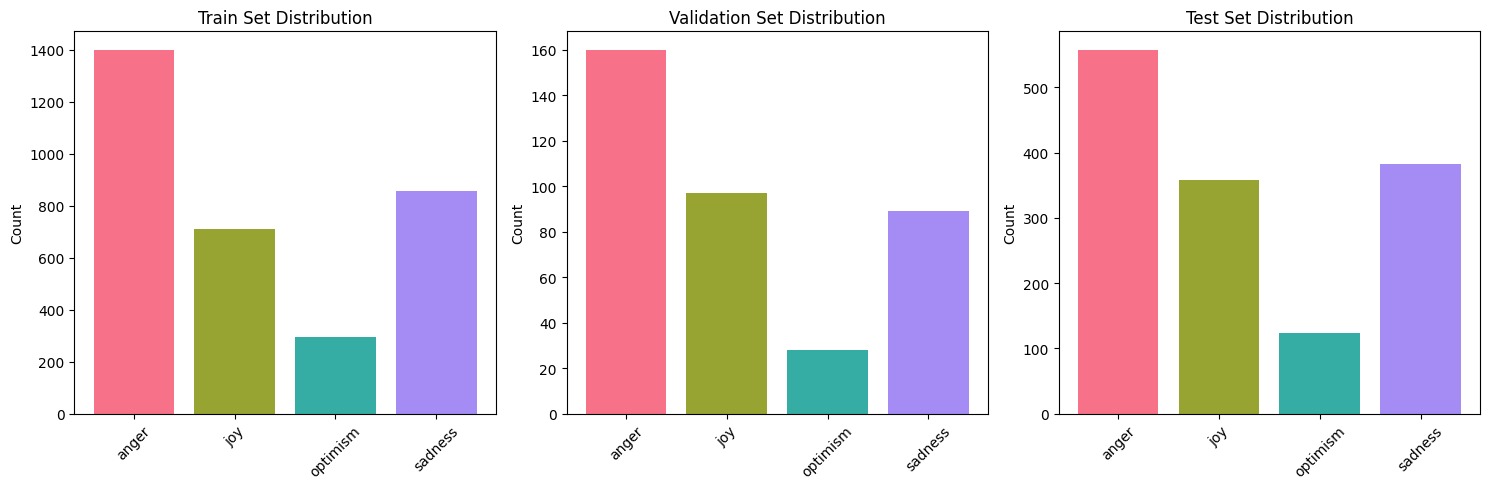

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = sns.color_palette("husl", len(emotion_labels))

for idx, (split_name, split_counts, ax) in enumerate([
    ("Train", label_counts_train, axes[0]),
    ("Validation", label_counts_val, axes[1]),
    ("Test", label_counts_test, axes[2])
]):
    counts = [split_counts[i] for i in sorted(split_counts.keys())]
    labels = [emotion_labels[i] for i in sorted(emotion_labels.keys())]

    ax.bar(labels, counts, color=colors)
    ax.set_title(f'{split_name} Set Distribution')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

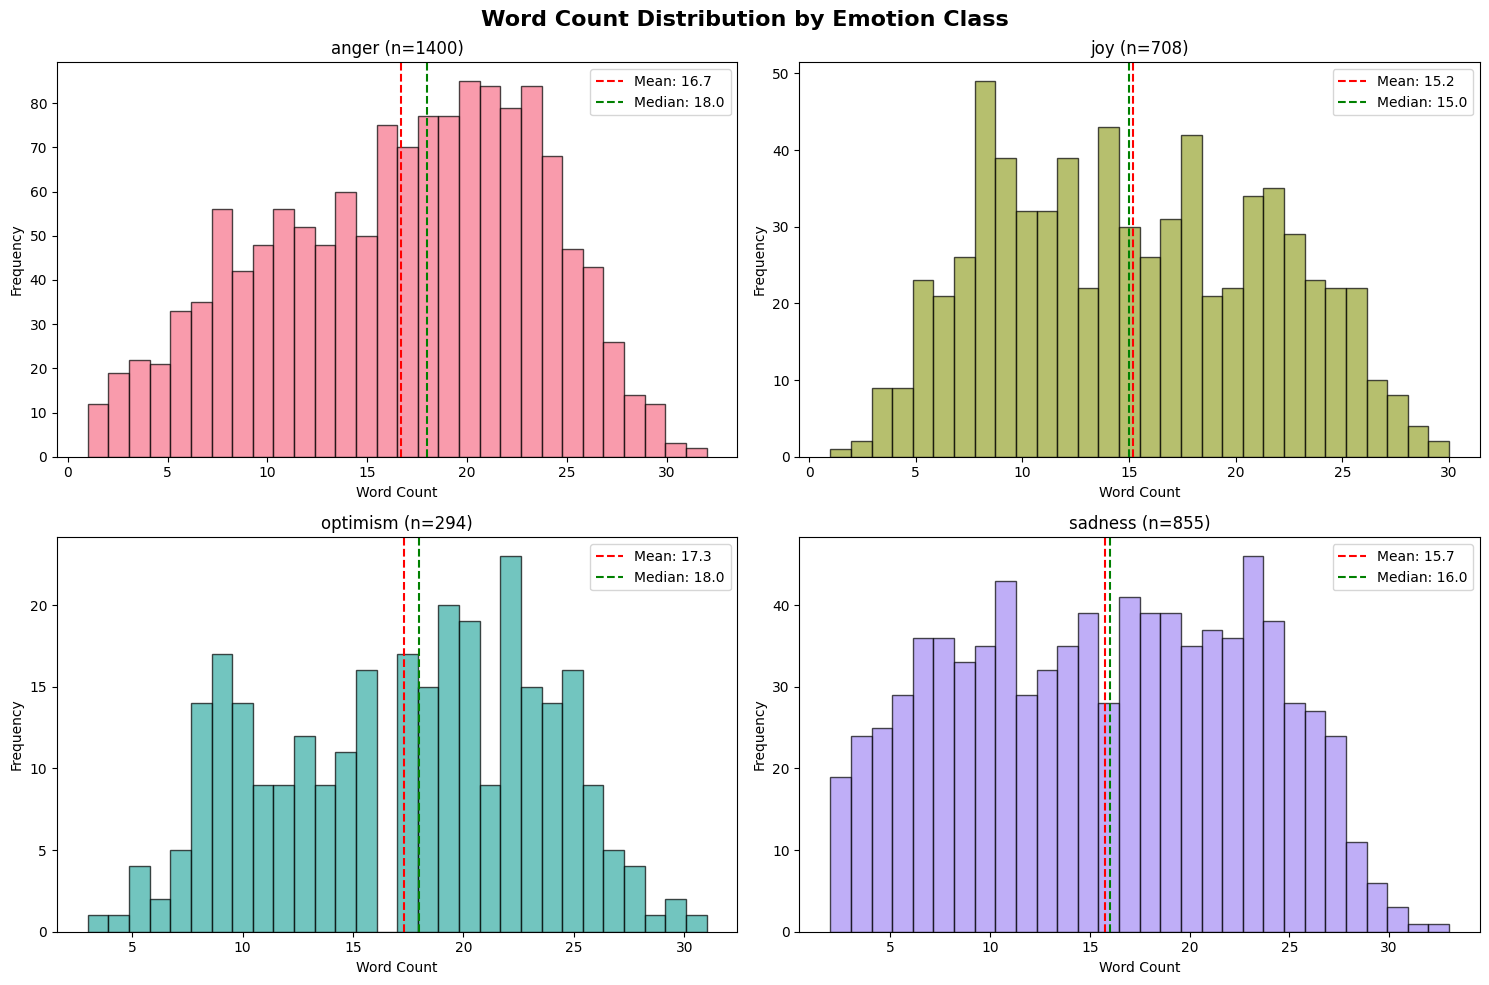

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Word Count Distribution by Emotion Class', fontsize=16, fontweight='bold')

for i, (label, emotion) in enumerate(emotion_labels.items()):
    ax = axes[i//2, i%2]

    emotion_lengths = [len(text.split()) for text, lbl in zip(train_dataset["text"], train_labels) if lbl == label]

    ax.hist(emotion_lengths, bins=30, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'{emotion} (n={len(emotion_lengths)})')
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Frequency')

    mean_val = np.mean(emotion_lengths)
    median_val = np.median(emotion_lengths)
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
    ax.legend()

plt.tight_layout()
plt.show()



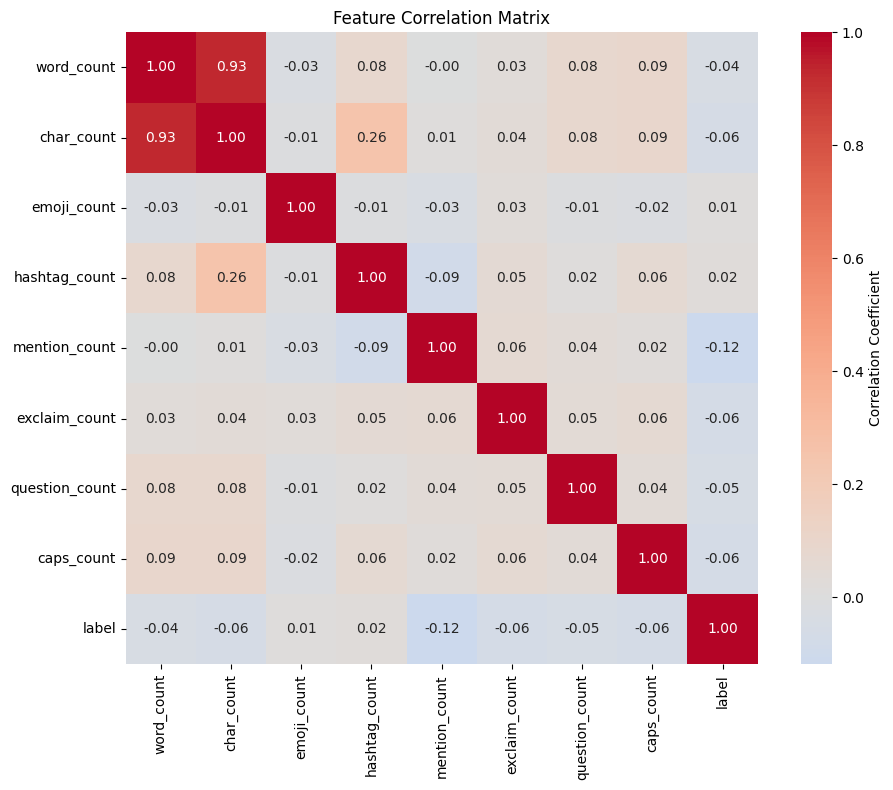

In [20]:
import pandas as pd

feature_data = []
for i in range(len(train_dataset)):
    feature_data.append({
        'word_count': text_lengths_train[i],
        'char_count': char_lengths_train[i],
        'emoji_count': emoji_counts_train[i],
        'hashtag_count': hashtag_counts_train[i],
        'mention_count': mention_counts_train[i],
        'exclaim_count': exclaim_counts[i],
        'question_count': question_counts[i],
        'caps_count': caps_counts[i],
        'label': train_labels[i]
    })

feature_df = pd.DataFrame(feature_data)

plt.figure(figsize=(10, 8))
correlation_matrix = feature_df.corr()
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

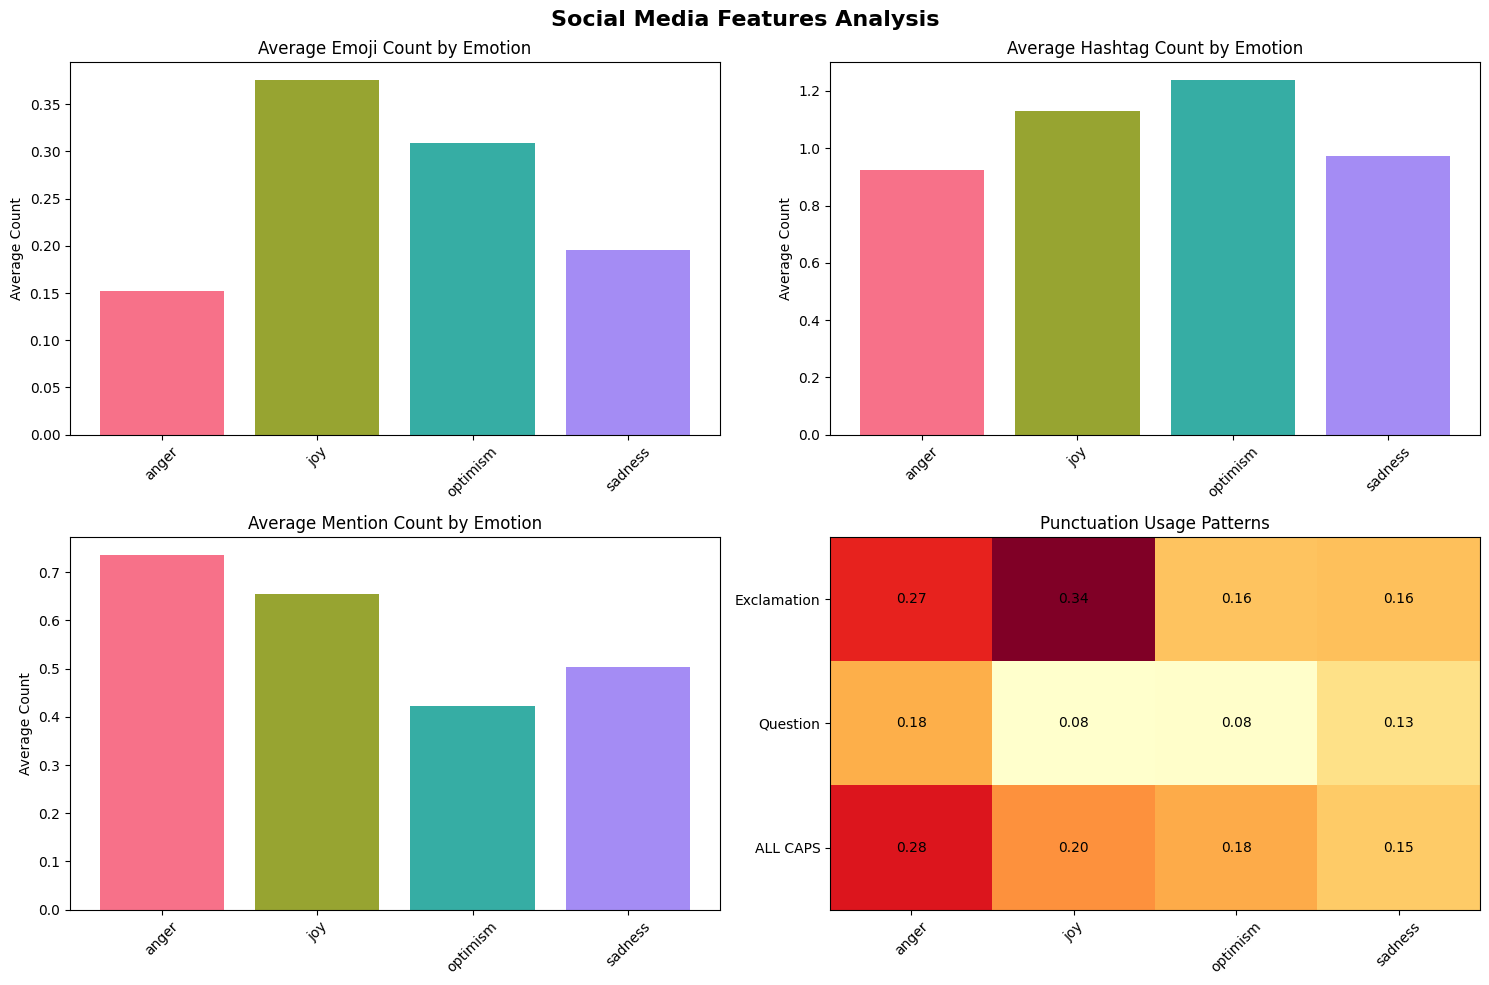

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Social Media Features Analysis', fontsize=16, fontweight='bold')

emotions = list(emotion_labels.values())
emoji_means = []
hashtag_means = []
mention_means = []
punct_means = {'exclaim': [], 'question': [], 'caps': []}

for label in sorted(emotion_labels.keys()):
    emotion_indices = [i for i, lbl in enumerate(train_labels) if lbl == label]
    emoji_means.append(np.mean([emoji_counts_train[i] for i in emotion_indices]))
    hashtag_means.append(np.mean([hashtag_counts_train[i] for i in emotion_indices]))
    mention_means.append(np.mean([mention_counts_train[i] for i in emotion_indices]))

    punct_means['exclaim'].append(np.mean([exclaim_counts[i] for i in emotion_indices]))
    punct_means['question'].append(np.mean([question_counts[i] for i in emotion_indices]))
    punct_means['caps'].append(np.mean([caps_counts[i] for i in emotion_indices]))

axes[0,0].bar(emotions, emoji_means, color=colors)
axes[0,0].set_title('Average Emoji Count by Emotion')
axes[0,0].set_ylabel('Average Count')
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].bar(emotions, hashtag_means, color=colors)
axes[0,1].set_title('Average Hashtag Count by Emotion')
axes[0,1].set_ylabel('Average Count')
axes[0,1].tick_params(axis='x', rotation=45)

axes[1,0].bar(emotions, mention_means, color=colors)
axes[1,0].set_title('Average Mention Count by Emotion')
axes[1,0].set_ylabel('Average Count')
axes[1,0].tick_params(axis='x', rotation=45)

punct_matrix = np.array([punct_means['exclaim'], punct_means['question'], punct_means['caps']])
im = axes[1,1].imshow(punct_matrix, cmap='YlOrRd', aspect='auto')
axes[1,1].set_title('Punctuation Usage Patterns')
axes[1,1].set_xticks(range(len(emotions)))
axes[1,1].set_xticklabels(emotions, rotation=45)
axes[1,1].set_yticks(range(3))
axes[1,1].set_yticklabels(['Exclamation', 'Question', 'ALL CAPS'])

for i in range(3):
    for j in range(len(emotions)):
        axes[1,1].text(j, i, f'{punct_matrix[i,j]:.2f}',
                      ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [22]:
overlap_train_val = set(train_dataset["text"]).intersection(val_dataset["text"])
print("Train-Val Overlap:", len(overlap_train_val))

Train-Val Overlap: 0
